In [2]:
from moviepy.editor import AudioFileClip

video_path = '../data/raw/Green_noise.mp4'
audio_path = '../data/raw/Green_noise.wav'

# # Read the audio from the mp4 file
# audio_clip = AudioFileClip(video_path)

# # Save the audio as a separate wav file
# audio_clip.write_audiofile(audio_path)

In [5]:
import librosa
import numpy

audio, sr = librosa.load(audio_path, sr=44100)
print(audio.shape, sr)

(1073741823,) 44100


In [7]:
def resample_audio(audio, sr, new_sr):
    resampled_audio = librosa.resample(audio, orig_sr = sr, target_sr=new_sr)
    return resampled_audio

resampled_audio = resample_audio(audio, sr, 32000)
print(resampled_audio.shape)

(779132389,)


In [12]:
import numpy as np
import soundfile as sf
import os

# Define the duration of each snippet in seconds
snippet_duration = 5
output_path = '../data/raw/green/'

os.makedirs(output_path+'train_audio', exist_ok=True)

# Calculate the total number of snippets
total_snippets = len(resampled_audio) // (snippet_duration * sr)
filenames = []
# Iterate over each snippet
for i in range(total_snippets):
    # Calculate the start and end indices of the current snippet
    start_index = i * snippet_duration * sr
    end_index = (i + 1) * snippet_duration * sr

    # Extract the current snippet from the resampled audio
    snippet = resampled_audio[start_index:end_index] * np.random.rand(1)

    # Define the filename for the current snippet
    filename = f"{output_path}train_audio/snippet_{i+1}.wav"
    filenames.append(f'snippet_{i+1}.wav')
    # Save the snippet as a separate WAV file
    sf.write(filename, snippet, sr, format='wav')

In [14]:
# Make the metadata
import pandas as pd
metadata = pd.DataFrame({
    'filename': filenames,
    'primary_label': ['silent'] * len(filenames),
    "secondary_labels": ['[]'] * len(filenames),
    "rating": [5] * len(filenames)
})

metadata.to_csv(f'{output_path}train_metadata.csv')

32000


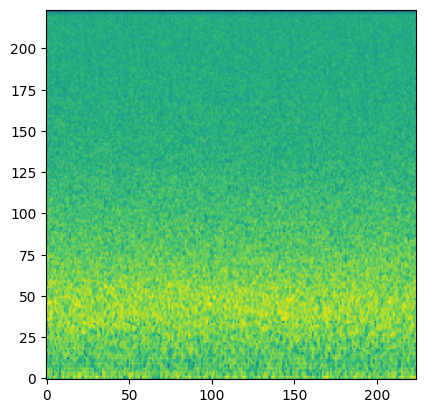

In [20]:
noise_snippet, sr = librosa.load(filename, sr=32000)
print(sr)
import functools

import torch
import torchaudio
from src.modules.training.datasets.to_2d.spec import Spec

spec_class = Spec(spec=functools.partial(torchaudio.transforms.MelSpectrogram), output_shape=[224,224])

spec_out = spec_class(torch.from_numpy(noise_snippet))
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(spec_out.numpy(),origin='lower')